# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [2]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [3]:
# Import dataframe "data.csv"
df = pd.read_csv('/content/data.csv')

### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [4]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print(" Missing values: ")
print(df.isnull().sum())

Number of rows : 9582

Display of dataset: 


,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux



Basics statistics: 


,Entreprise,Metier,Technologies,Diplome,Experience,Ville
count,9565,9563,9582,9582,9488,9582
unique,1382,4,57,4,21,14
top,Ball Aerospace,Data scientist,SQL/R/Python//Big data,Master,"1,5",Paris
freq,748,3865,539,4971,1023,2015



 Missing values: 
Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64


Oui , il manque des données dans ces trois colonnes : Entreprise / Metier / Experience 


### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [5]:
#Remplace "," with "."
df["Experience"] = [float(str(i).replace(",", ".")) for i in df["Experience"]]


In [6]:
#Remplacer en utilisant la moyenne pour les data scientists
mask_DS = df['Metier']=='Data scientist'
median = df.loc[mask_DS, 'Experience'].dropna().median()
df.loc[mask_DS, 'Experience'] = df.loc[mask_DS, 'Experience'].fillna(median)


#Remplacer en utilisant la moyenne pour les data engineers
mask_DE = df['Metier']=='Data engineer'
mean_DE = df.loc[mask_DE, 'Experience'].dropna().mean()
df.loc[mask_DE, 'Experience'] = df.loc[mask_DE, 'Experience'].fillna(mean_DE)

df.head()


,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux


### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [7]:
# Remplacer en utilisant la moyenne pour les Lead data scientist
mask_LD = df['Metier'] == 'Lead data scientist'
mean_LD = df.loc[mask_LD, 'Experience'].dropna().mean()
df.loc[mask_LD, 'Experience'] = df.loc[mask_LD, 'Experience'].fillna(mean_DE)

# Remplacer en utilisant la moyenne pour les Data Architecte
mask_AR = df['Metier'] == 'Data architecte'
mean_AR = df.loc[mask_AR, 'Experience'].dropna().mean()
df.loc[mask_AR, 'Experience'] = df.loc[mask_AR, 'Experience'].fillna(mean_DE)

#Calcul de la moyenne des data scientist
mean_DS= df.loc[mask_DS, 'Experience'].dropna().mean()
print("Les valeurs manquantes dans Experience : {0:d}.\n".format(df['Experience'].isna().sum()))

print("Nombre moyenne d'années d'expériences: \n le data scientist:" 
      ,round(mean_DS,3),"\n le lead data scientist:",round(mean_LD,3),
      "\n data engineer:",round(mean_DE,3))

Les valeurs manquantes dans Experience : 0.

Nombre moyenne d'années d'expériences: 
 le data scientist: 2.241 
 le lead data scientist: 3.965 
 data engineer: 2.985


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

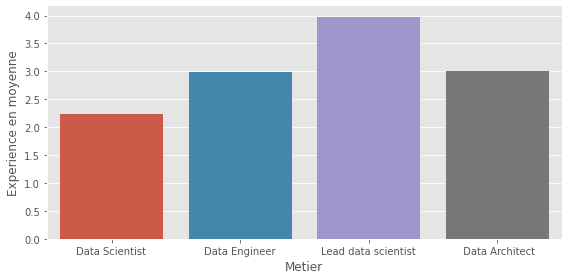

In [8]:

data = [['Data Scientist', mean_DS], ['Data Engineer', mean_DE], ['Lead data scientist', mean_LD] , [' Data Architect', mean_AR]]
df1 = pd.DataFrame(data, columns = ['Metier', 'Experience en moyenne'])
df1['Diplome']= df['Diplome']

sb.catplot(x='Metier', y='Experience en moyenne', kind="bar", data=df1, height=4, aspect=2)



### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

In [9]:
print ('Débutant = Experience <2 ans \n Confirmé =Experience enre 2 et 4 ans \n Avancé= Experience entre 4 et 7 ans \n et Expert= Experience >7 ans')
x = df['Experience']

df['Exp_label'] = ['débutant' if x <2 else 'confirmé' if 2 <= x <4  else 'avancé' if 4 < x <7   else 'expert' if x > 7 else 'nan' for x in df['Experience']]
df


Débutant = Experience <2 ans 
 Confirmé =Experience enre 2 et 4 ans 
 Avancé= Experience entre 4 et 7 ans 
 et Expert= Experience >7 ans


,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,confirmé
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,confirmé
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,débutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé
...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon,débutant
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse,expert
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris,débutant
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes,expert


### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

In [10]:
df1= df.Technologies.apply(lambda x: pd.value_counts(x.split("/"))).sum(axis = 0)
r= pd.DataFrame({'Technologies':df1.index, 'count':df1.values}).sort_values(by=['count'],ascending=False)
r1= r.head(5)
print("Le 5 technologies les plus utilisés sont: \n",)
print(r1)

Le 5 technologies les plus utilisés sont: 

   Technologies   count
0        Python  6627.0
10            R  4374.0
12          SQL  2581.0
6          Java  1719.0
23       Hadoop  1589.0


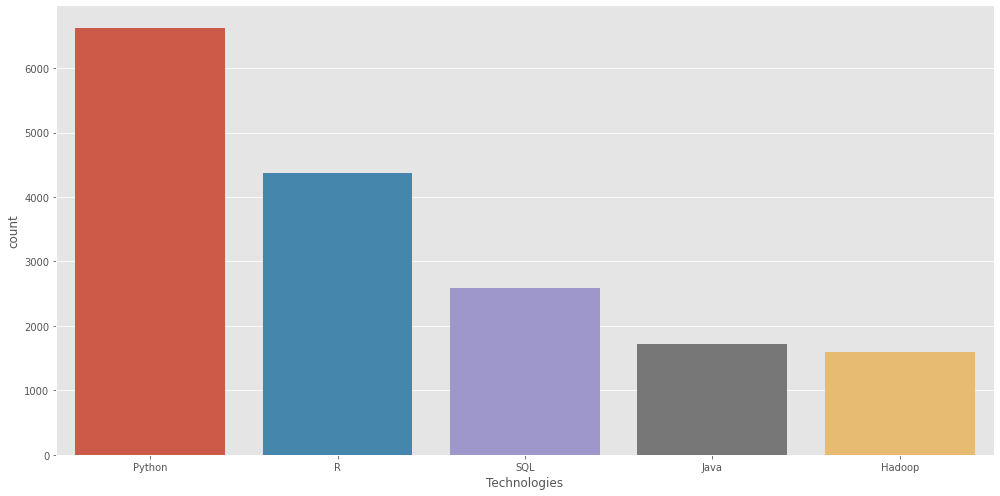

In [11]:
sb.catplot(x='Technologies', y='count', kind="bar", data=r1, height=7, aspect=2)

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [25]:
print('The K-means method will be used')

# Encoder the categorical variables
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()

df2 = df.loc[:,['Experience']]
df2['Ville'] = pd.Series(lab.fit_transform(np.squeeze(df.loc[:,['Ville']])[:]), index = df2.index)
df2['Technologies'] = pd.Series(lab.fit_transform(np.squeeze(df.loc[:,['Technologies']])[:]), index = df2.index)
df2['Diplome'] = pd.Series(lab.fit_transform(np.squeeze(df.loc[:,['Diplome']])[:]), index = df2.index)
df2['Exp_label'] = pd.Series(lab.fit_transform(np.squeeze(df.loc[:,['Exp_label']])[:]), index = df2.index)
df2['Metier'] = pd.Series(lab.fit_transform(np.squeeze(df.loc[:,['Metier']])[:]), index = df2.index)
df2 = np.round(df2,2)
df2.head()

The K-means method will be used


,Experience,Ville,Technologies,Diplome,Exp_label,Metier
0,1.0,8,27,1,2,2
1,3.0,4,34,1,1,0
2,3.0,6,51,1,1,3
3,1.5,4,2,1,2,2
4,2.0,0,26,3,1,2


In [26]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

X = df2.astype(float)

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(X)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[-0.67050765,  0.55797821, -0.17304965, -0.42495901,  0.29794277,
         0.56793337],
       [ 0.06934646, -0.5054822 ,  0.23989798, -0.42495901, -0.68888323,
        -1.47521946],
       [ 0.06934646,  0.02624801,  1.2427708 , -0.42495901, -0.68888323,
         1.58950979],
       [-0.48554412, -0.5054822 , -1.64786261, -0.42495901,  0.29794277,
         0.56793337],
       [-0.30058059, -1.56894261, -0.23204216,  1.56865529, -0.68888323,
         0.56793337]])

In [27]:
# Import K-Means 
from sklearn.cluster import KMeans

# Instanciate KMeans with k=2 and initialisation with k-means++

kmeans = KMeans(n_clusters=2, random_state=0)

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

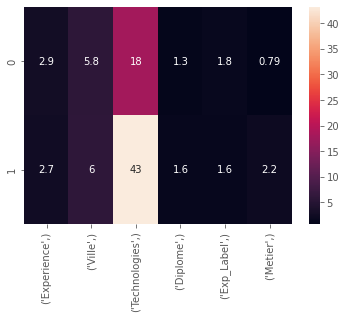

In [28]:
# Cluster centers coordinates
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)

# Get column names 
labels = ['Experience'],['Ville'],['Technologies'],['Diplome'],['Exp_Label'],['Metier']
# Create a heatmap 
sb.heatmap(pd.DataFrame(cluster_centers, columns=labels) , annot=True)



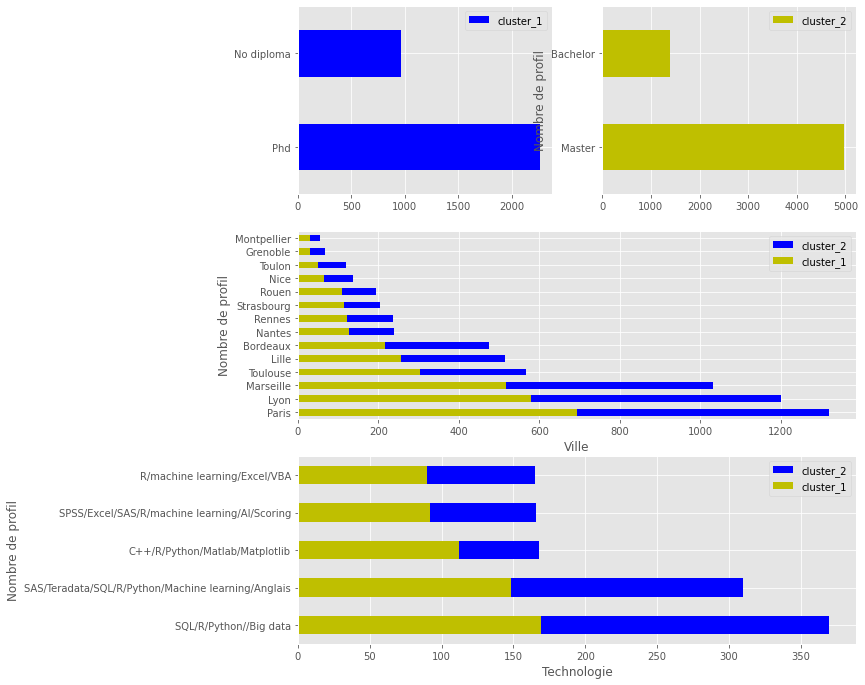

In [36]:
# Cluster characteristic
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, max_iter = 100, algorithm = 'auto')
kmeans.fit(X_scaled)
labels_ = kmeans.labels_


plt.figure(figsize=(10,20))
labels_ = kmeans.labels_
plt.subplot(523),
ax = df.loc[labels_==1,'Diplome'].value_counts().plot(kind='barh', color='b', label='cluster_1')
plt.legend()
plt.subplot(524),
ax = df.loc[labels_==0,'Diplome'].value_counts().plot(kind='barh', color='y', label='cluster_2')
plt.ylabel("Nombre de profil")
plt.legend()

plt.subplot(513),
ax = df.loc[labels_==0,'Ville'].value_counts().plot(kind='barh', color = 'b', label='cluster_2')
ax = df.loc[labels_==1,'Ville'].value_counts().plot(kind='barh', color = 'y', label='cluster_1')
plt.ylabel("Nombre de profil")
plt.xlabel("Ville")
plt.legend()

plt.subplot(514),
ax = df.loc[labels_==0,'Technologies'].value_counts()[0:5].plot(kind='barh', color = 'b', label='cluster_2')
ax = df.loc[labels_==1,'Technologies'].value_counts()[0:5].plot(kind='barh', color = 'y', label='cluster_1')
plt.ylabel("Nombre de profil")
plt.xlabel("Technologie")
plt.legend()





In [ ]:

# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, max_iter = 100, algorithm = 'auto')
kmeans.fit(X_scaled)
labels_ = kmeans.labels_ 


#Clustering Error
c1, c2 = kmeans.cluster_centers_
NMSE = lambda a,b: 100 * ((a-b)**2).sum() / ((a)**2).sum()
Quad_dist1 = NMSE(X_scaled[labels_==0], c1) 
Quad_dist2 = NMSE(X_scaled[labels_==1], c2) 

print('Mean Squared Error.: {0:2.2f}% et {1:2.2f} %'.format(quad_dist1, quad_dist2))
print('The "Technologies" variable is uniform distributed ')




Mean Squared Error.: 16.72% et 27.81 %
The "Technologies" variable is uniform distributed 


9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
* Justifier la performance de votre algorithme grace à une métrique.
* Interpréter votre resultat.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay

# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["Experience", "Technologies", "Diplome"]
target_variable = "Metier"

X = df2.loc[:,features_list]
Y = df2.loc[:,target_variable]

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
Y : 
0    2
1    0
2    3
3    2
4    2
Name: Metier, dtype: int64

X :
   Experience  Technologies  Diplome
0         1.0            27        1
1         3.0            34        1
2         3.0            51        1
3         1.5             2        1
4         2.0            26        3


In [ ]:
# Automatically detect positions of numeric/categorical features
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['Experience', 'Technologies', 'Diplome']  at positions  [0, 1, 2]
Found categorical features  []  at positions  []


In [ ]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)


Dividing into train and test sets...


In [ ]:
# numeric transformation 
numeric_transformer = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy="mean")),
        ("num_scaler", StandardScaler())
    ]
)

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = preprocessor.fit_transform(X_train)
print(X_train[0:5,:])

# Label encoding
print("Encoding labels...")
print(Y_train.head())
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print(Y_train[0:5])

[[ 0.44931561  0.52958506 -1.4282129 ]
 [ 0.26214147  0.70601878 -0.42892017]
 [-0.67372922 -1.76405333  0.57037257]
 [-0.67372922 -1.23475217 -0.42892017]
 [-1.04807749  1.11769747 -1.4282129 ]]
Encoding labels...
3146    2
906     2
833     1
7366    2
3376    2
Name: Metier, dtype: int64
[2 2 1 2 2]


In [ ]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)


Train model...


LogisticRegression()

In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print(Y_train_pred)
print()

Predictions on training set...
[2 2 1 ... 2 2 2]



In [ ]:
# Encoding categorical features and standardizing numerical features
print(X_test.head())
X_test = preprocessor.transform(X_test)
print(X_test[0:5,:])

# Label encoding
print("Encoding labels...")
print(Y_test[0:5])
Y_test = encoder.transform(Y_test)
print(Y_test[0:5])

      Experience  Technologies  Diplome
1815         3.5            26        1
8076         2.5            52        1
6808         0.5            47        1
4377         2.5            35        1
2278         3.0            50        1
[[ 0.26214147 -0.23496107 -0.42892017]
 [-0.11220681  1.29413119 -0.42892017]
 [-0.86090336  1.00007498 -0.42892017]
 [-0.11220681  0.29434009 -0.42892017]
 [ 0.07496733  1.17650871 -0.42892017]]
Encoding labels...
1815    3
8076    3
6808    2
4377    3
2278    2
Name: Metier, dtype: int64
[3 3 2 3 2]


In [ ]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print(Y_test_pred)

Predictions on test set...
[2 2 2 ... 2 2 1]


In [ ]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

accuracy on training set :  0.4542726679712981
accuracy on test set :  0.45644235785080856


The accuracy in the both set are small than 50% , so the model results predection for the Metier varibale are not relevant. 
